**Problem Statement**:Kitabi Duniya, a famous book store in India, which was established before Independence, the growth of the company was incremental year by year, but due to online selling of books and wide spread Internet access its annual growth started to collapse, seeing sharp downfalls, you as a Data Scientist help this heritage book store gain its popularity back and increase footfall of customers and provide ways the bus iness can improve exponentially, apply Association RuleAlgorithm, explain the rules, and visualize the graphs for clear understanding of solution.

In [39]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [44]:
book=pd.read_csv(r'C:\Users\SALLA BHAVANA\Desktop\data science\Association Rules unsupervised\Datasets_Association Rules\book.csv')

In [45]:
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [46]:
frequent_itemsets = apriori(book, min_support=0.0025, max_len=4 ,use_colnames = True)

In [47]:
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
549,0.0040,"(ArtBks, ItalAtlas, Florence, ItalArt)"
550,0.0090,"(ItalAtlas, ItalCook, ItalArt, GeogBks)"
551,0.0035,"(ItalAtlas, ItalCook, Florence, GeogBks)"
552,0.0075,"(ItalCook, Florence, ItalArt, GeogBks)"


In [48]:
frequent_itemsets.sort_values('support',ascending = False, inplace = True)

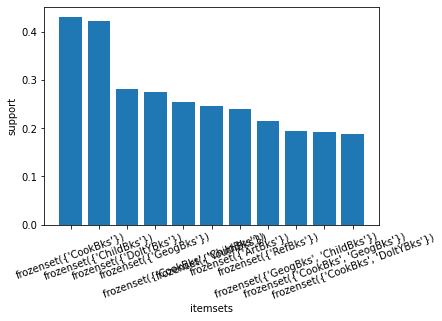

In [50]:
plt.bar(x = list(range(0, 11)), height = frequent_itemsets.support[0:11])
plt.xticks(list(range(0, 11)), frequent_itemsets.itemsets[0:11], rotation=20)
plt.xlabel('itemsets')
plt.ylabel('support')
plt.show()

In [51]:
rules=association_rules(frequent_itemsets, metric='lift', min_threshold=1)

In [52]:
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
2,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
3,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
4,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
5,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
6,(CookBks),(DoItYBks),0.4310,0.2820,0.1875,0.435035,1.542677,0.065958,1.270875
7,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
8,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
9,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770


In [54]:
rules.sort_values('lift', ascending =False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2183,"(ItalArt, RefBks)","(ArtBks, ItalAtlas)",0.0200,0.0180,0.0165,0.825000,45.833333,0.016140,5.611429
2178,"(ArtBks, ItalAtlas)","(ItalArt, RefBks)",0.0180,0.0200,0.0165,0.916667,45.833333,0.016140,11.760000
5149,"(ItalArt, RefBks)","(ItalAtlas, Florence)",0.0200,0.0065,0.0040,0.200000,30.769231,0.003870,1.241875
5144,"(ItalAtlas, Florence)","(ItalArt, RefBks)",0.0065,0.0200,0.0040,0.615385,30.769231,0.003870,2.548000
3333,"(ItalAtlas, GeogBks)","(ItalArt, RefBks)",0.0205,0.0200,0.0115,0.560976,28.048780,0.011090,2.232222
3336,"(ItalArt, RefBks)","(ItalAtlas, GeogBks)",0.0200,0.0205,0.0115,0.575000,28.048780,0.011090,2.304706
3078,"(ItalAtlas, ItalCook)","(ItalArt, RefBks)",0.0230,0.0200,0.0125,0.543478,27.173913,0.012040,2.146667
3083,"(ItalArt, RefBks)","(ItalAtlas, ItalCook)",0.0200,0.0230,0.0125,0.625000,27.173913,0.012040,2.605333
2557,"(ItalAtlas, ChildBks)","(ItalArt, RefBks)",0.0285,0.0200,0.0145,0.508772,25.438596,0.013930,1.995000
2560,"(ItalArt, RefBks)","(ItalAtlas, ChildBks)",0.0200,0.0285,0.0145,0.725000,25.438596,0.013930,3.532727


In [55]:
################################# Extra part ###################################

In [56]:
def to_list(i):
    return (sorted(list(i)))

In [57]:
ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)

In [58]:
ma_X = ma_X.apply(sorted)

In [59]:
ma_X

0                           [ChildBks, CookBks]
1                           [ChildBks, CookBks]
2                           [ChildBks, GeogBks]
3                           [ChildBks, GeogBks]
4                            [CookBks, GeogBks]
                         ...                   
5613    [ArtBks, Florence, ItalAtlas, YouthBks]
5614    [ArtBks, Florence, ItalAtlas, YouthBks]
5615    [ArtBks, Florence, ItalAtlas, YouthBks]
5616    [ArtBks, Florence, ItalAtlas, YouthBks]
5617    [ArtBks, Florence, ItalAtlas, YouthBks]
Length: 5618, dtype: object

In [60]:
rules_sets = list(ma_X)

In [61]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]

In [62]:
unique_rules_sets

[['ArtBks', 'Florence', 'YouthBks'],
 ['ArtBks', 'CookBks', 'ItalArt'],
 ['CookBks', 'DoItYBks', 'RefBks'],
 ['ChildBks', 'DoItYBks', 'ItalArt', 'YouthBks'],
 ['ArtBks', 'ChildBks', 'YouthBks'],
 ['CookBks', 'GeogBks', 'ItalAtlas', 'YouthBks'],
 ['ChildBks', 'Florence', 'ItalArt', 'RefBks'],
 ['CookBks', 'ItalAtlas', 'ItalCook', 'RefBks'],
 ['DoItYBks', 'GeogBks', 'ItalCook'],
 ['ChildBks', 'GeogBks', 'ItalArt', 'ItalCook'],
 ['ArtBks', 'ChildBks'],
 ['Florence', 'GeogBks', 'ItalArt', 'ItalCook'],
 ['ArtBks', 'ItalAtlas', 'ItalCook', 'RefBks'],
 ['ChildBks', 'DoItYBks', 'ItalCook', 'YouthBks'],
 ['DoItYBks', 'GeogBks', 'ItalAtlas'],
 ['ArtBks', 'ChildBks', 'ItalArt'],
 ['ChildBks', 'GeogBks', 'ItalArt', 'ItalAtlas'],
 ['ArtBks', 'CookBks', 'GeogBks', 'ItalCook'],
 ['DoItYBks', 'GeogBks', 'ItalArt', 'RefBks'],
 ['Florence', 'GeogBks', 'ItalArt', 'ItalAtlas'],
 ['CookBks', 'DoItYBks', 'GeogBks', 'RefBks'],
 ['CookBks', 'ItalCook'],
 ['ChildBks', 'CookBks', 'ItalArt', 'ItalCook'],
 ['DoIt

In [65]:
index_rules=[]
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [66]:
index_rules

[1924,
 820,
 174,
 3576,
 248,
 4300,
 4932,
 1536,
 938,
 1944,
 14,
 4370,
 2998,
 1460,
 3914,
 926,
 3748,
 912,
 4732,
 5422,
 602,
 62,
 1192,
 1848,
 1284,
 1758,
 4092,
 1228,
 3348,
 1958,
 3982,
 3886,
 42,
 4612,
 506,
 1344,
 16,
 2834,
 5056,
 0,
 2320,
 382,
 4670,
 4044,
 3782,
 4182,
 4794,
 4258,
 1570,
 3390,
 2764,
 4542,
 3418,
 1074,
 554,
 80,
 4244,
 5298,
 2642,
 1132,
 3700,
 4140,
 984,
 2040,
 2154,
 2292,
 92,
 840,
 112,
 1780,
 882,
 1794,
 160,
 3858,
 86,
 280,
 4472,
 670,
 1514,
 678,
 5506,
 3796,
 66,
 430,
 3432,
 126,
 3328,
 1882,
 3536,
 166,
 1338,
 438,
 2084,
 3300,
 4356,
 1986,
 60,
 208,
 4746,
 1652,
 3252,
 2062,
 2518,
 4210,
 4946,
 1406,
 172,
 2662,
 466,
 2676,
 1358,
 4668,
 5548,
 1488,
 798,
 1918,
 1212,
 36,
 4286,
 294,
 3342,
 4002,
 4112,
 1994,
 3522,
 6,
 1290,
 854,
 998,
 656,
 2424,
 12,
 4230,
 2986,
 3088,
 2806,
 4016,
 1166,
 1658,
 4106,
 1178,
 1012,
 1884,
 2718,
 4426,
 5416,
 1028,
 1842,
 3110,
 1230,
 3446,
 

In [68]:
no_redundancy= rules.iloc[index_rules,:]

In [69]:
no_redundancy

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1924,"(ArtBks, YouthBks)",(Florence),0.1010,0.1085,0.0190,0.188119,1.733814,0.008041,1.098067
820,"(ArtBks, CookBks)",(ItalArt),0.1670,0.0485,0.0410,0.245509,5.062041,0.032900,1.261115
174,"(CookBks, RefBks)",(DoItYBks),0.1525,0.2820,0.0845,0.554098,1.964888,0.041495,1.610221
3576,"(DoItYBks, YouthBks, ItalArt)",(ChildBks),0.0150,0.4230,0.0105,0.700000,1.654846,0.004155,1.923333
248,"(ArtBks, YouthBks)",(ChildBks),0.1010,0.4230,0.0805,0.797030,1.884231,0.037777,2.842780
...,...,...,...,...,...,...,...,...,...
796,(Florence),(GeogBks),0.1085,0.2760,0.0425,0.391705,1.419221,0.012554,1.190212
3040,"(ItalAtlas, YouthBks, CookBks)",(RefBks),0.0125,0.2145,0.0125,1.000000,4.662005,0.009819,inf
3590,"(ArtBks, Florence, ItalArt)",(ChildBks),0.0125,0.4230,0.0105,0.840000,1.985816,0.005213,3.606250
1890,"(CookBks, ItalArt, GeogBks)",(ChildBks),0.0250,0.4230,0.0190,0.760000,1.796690,0.008425,2.404167


In [71]:
no_redundancy.sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5180,"(ArtBks, ItalAtlas, Florence)",(ItalArt),0.0040,0.0485,0.0040,1.000000,20.618557,0.003806,inf
3156,"(ArtBks, ItalAtlas, ItalCook)",(ItalArt),0.0130,0.0485,0.0125,0.961538,19.825535,0.011870,24.739000
4154,"(ArtBks, ItalAtlas, YouthBks)",(ItalArt),0.0090,0.0485,0.0085,0.944444,19.473081,0.008064,17.127000
2910,"(ArtBks, CookBks, ItalAtlas)",(ItalArt),0.0140,0.0485,0.0130,0.928571,19.145803,0.012321,13.321000
2142,"(ArtBks, ItalAtlas)",(ItalArt),0.0180,0.0485,0.0165,0.916667,18.900344,0.015627,11.418000
3824,"(ArtBks, ItalCook, Florence)",(ItalArt),0.0120,0.0485,0.0095,0.791667,16.323024,0.008918,4.567200
5506,"(ItalAtlas, YouthBks, Florence)",(ItalArt),0.0035,0.0485,0.0025,0.714286,14.727541,0.002330,3.330250
1344,"(ArtBks, DoItYBks, ItalCook)",(ItalArt),0.0365,0.0485,0.0250,0.684932,14.122299,0.023230,3.019978
876,"(ArtBks, ItalCook)",(ItalArt),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461
862,"(ArtBks, CookBks, ItalCook)",(ItalArt),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461


At final result we  geting the Support Confidence and lift of all the items that helps to find the Association rule mining algorithms such as Apriori are very useful for finding simple associations between our data items